# Exploring actor data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time

In [25]:
DATA_PATH = "../../data/our_actor_data.csv"
pd.set_option("max_colwidth", None)

# Missing data

C:\Users\papad\AppData\Local\Temp\ipykernel_852\3368666909.py:1: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_actor = pd.read_csv(DATA_PATH)


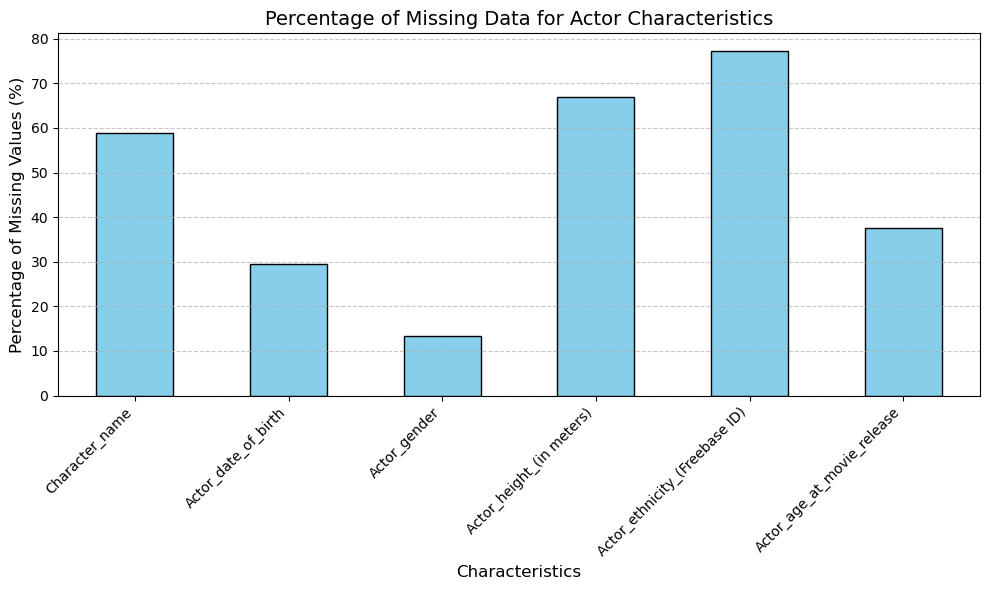

In [48]:
df_actor = pd.read_csv(DATA_PATH)

# Set 'Actor_name' as the index
df_actor_copy = df_actor.copy()
df_actor_copy.set_index('Actor_name', inplace=True)

# Calculate the percentage of missing values
missing_percentage = df_actor_copy.isna().sum() / len(df_actor_copy) * 100

# Keep only columns unrelated to movies and drop useless ones
columns_to_keep = [
    'Character_name', 
    'Actor_date_of_birth', 
    'Actor_gender', 
    'Actor_height_(in meters)', 
    'Actor_ethnicity_(Freebase ID)',
    'Actor_age_at_movie_release'
]

filtered_missing_percentage = missing_percentage[columns_to_keep]


# Plot the missing value percentages
plt.figure(figsize=(10, 6))
filtered_missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Data for Actor Characteristics', fontsize=14)
plt.xlabel('Characteristics', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analysis of gender parity across time

C:\Users\papad\AppData\Local\Temp\ipykernel_852\2765806797.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(Proportion=x['Count'] / x['Count'].sum()))


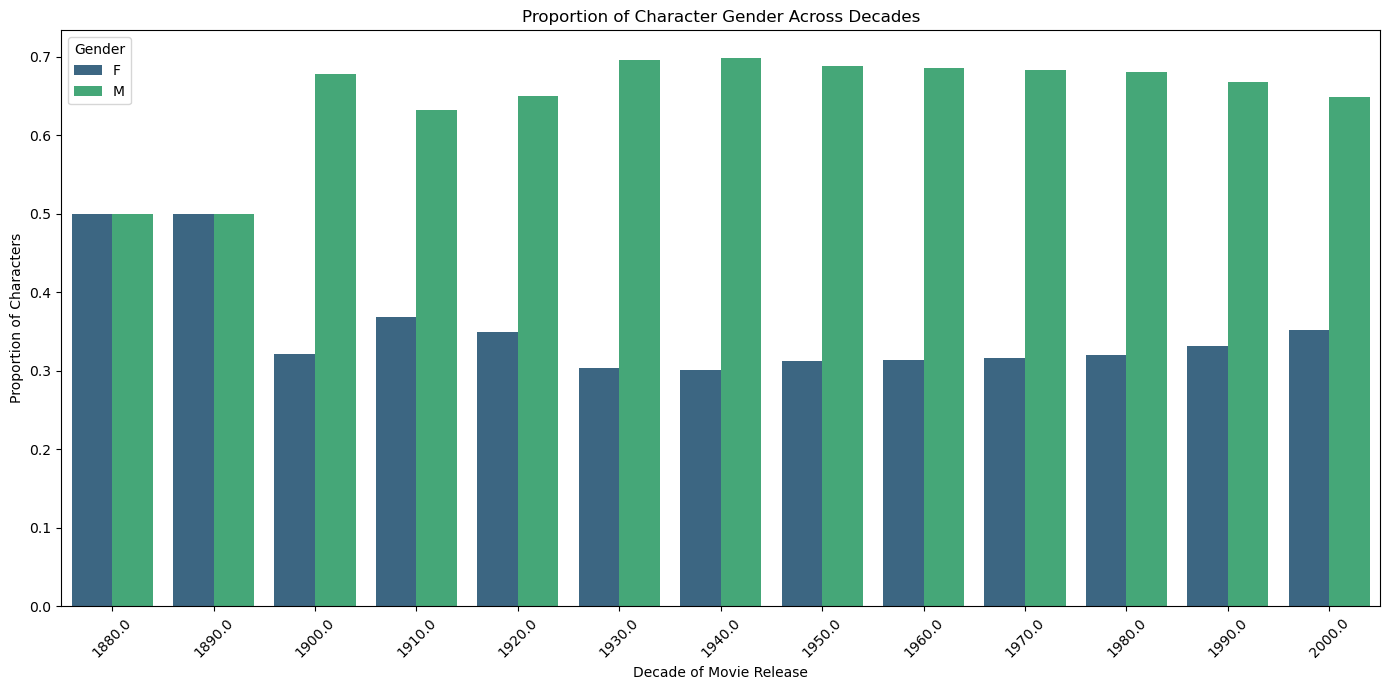

In [49]:
# Convert the 'Movie_release_date' column to datetime format, then extract the year
df_actor['Movie_release_date'] = pd.to_datetime(df_actor['Movie_release_date'], errors='coerce')
df_actor['Movie_release_date'] = df_actor['Movie_release_date'].dt.year

# Calculate decade for each movie release year
df_actor['Movie_release_decade'] = (df_actor['Movie_release_date'].dropna().astype(int) // 10) * 10

# Filter out the 2010s and drop any rows with missing data
df_actor = df_actor.dropna(subset=['Movie_release_decade', 'Actor_gender'])
df_actor = df_actor[df_actor['Movie_release_decade'] != 2010]

# Calculate gender counts per decade and reset index before applying proportions
gender_counts = df_actor.groupby(['Movie_release_decade', 'Actor_gender']).size().reset_index(name='Count')

# Calculate gender proportions by dividing each count by the total for each decade
gender_proportion = (
    gender_counts.groupby('Movie_release_decade')
    .apply(lambda x: x.assign(Proportion=x['Count'] / x['Count'].sum()))
    .reset_index(drop=True)  # Drop redundant index after apply
)

# Plotting the gender proportions across decades
plt.figure(figsize=(14, 7))
sns.barplot(data=gender_proportion, x='Movie_release_decade', y='Proportion', hue='Actor_gender', palette='viridis')
plt.xticks(rotation=45)
plt.title("Proportion of Character Gender Across Decades")
plt.xlabel("Decade of Movie Release")
plt.ylabel("Proportion of Characters")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

The graph shows that gender parity across time is relatively stable, but we will also analyze it by continent to investigate whether there are any regional differences.

In [50]:
# Clean the data
df_countries = df_actor[["Wikipedia_movie_ID", "Movie_countries"]].copy()
df_countries["Movie_countries"] = df_actor["Movie_countries"].str.split(", ").to_frame()
df_countries.dropna(inplace=True)

In [51]:
# Extract unique countries from the 'Movie_countries' column
all_countries = [c for cs in df_countries['Movie_countries'] for c in cs]
unique_country, counts_country = np.unique(all_countries, return_counts=True)
print(len(unique_country))
print(list(unique_country))

129
['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Crime', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'Egypt', 'England', 'Estonia', 'Ethiopia', 'Federal Republic of Yugoslavia', 'Finland', 'France', 'Georgia', 'Georgian SSR', 'German Democratic Republic', 'Germany', 'Greece', 'Guinea', 'Haiti', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'Kingdom of Great Britain', 'Kingdom of Italy', 'Korea', 'Kuwait', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malayalam Language', 'Malaysia', 'Mali', 'Mandatory Palestine', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Nazi Germany', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria'

In [52]:
country_mapping = {
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 
        'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Malaysia', 
        'Maldives', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territories', 'Philippines', 
        'Qatar', 'Republic of China (Taiwan)', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 
        'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen',
        "Burma", "Georgian SSR", "Hong Kong", "Iraqi Kurdistan", "Korea", "Macau", "Mandatory Palestine",
        "Palestinian territories", "Republic of China", "Taiwan", "Uzbek SSR", "Soviet Union", "Malayalam Language"
    ],
    'Africa': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 
        'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 
        'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast (Côte d\'Ivoire)', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
        'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 
        'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 
        'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 
        'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
        'Ukraine', 'United Kingdom', "Crime", "Czechoslovakia", "England", "Federal Republic of Yugoslavia", "German Democratic Republic",
        "Isle of Man", "Kingdom of Great Britain", "Kingdom of Italy", "Northern Ireland",
        "Republic of Macedonia", "Scotland", "Serbia and Montenegro", "Slovak Republic",
        "Socialist Federal Republic of Yugoslavia", "Soviet occupation zone", "Ukrainian SSR", "Ukranian SSR",
        "Wales", "Weimar Republic", "West Germany", "Yugoslavia", "German Language", "Nazi Germany"
    ],
    'North America': [
        'Canada', 'Costa Rica', 'Cuba', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 
        'Nicaragua', 'Panama', 'United States of America', "Aruba", "Bahamas", "Puerto Rico"
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 
        'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ]
}

In [53]:
def check_countries_in_mapping(country_mapping, country_list):
    # Collect all countries from the country_mapping
    all_countries = [c for cs in df_countries['Movie_countries'] for c in cs]

    # Check if all countries in the country_list are present in the country_mapping
    missing_countries = [c for c in country_list if c not in all_countries]
    
    if missing_countries:
        print("Missing countries:")
        for c in missing_countries:
            print(c)
    else:
        print("All countries from the list are present in the country mapping.")

check_countries_in_mapping(country_mapping, unique_country)

All countries from the list are present in the country mapping.


In [54]:
# Function to recategorize countries into continents based on the contry_mapping
def recategorize_countries(country_list, country_mapping):
    new_continent = set()  
    for genre in country_list:
        for category, genres in country_mapping.items():
            if genre in genres:
                new_continent.add(category) 
    return list(new_continent) 

df_countries['continent'] = df_countries['Movie_countries'].apply(lambda c: recategorize_countries(c, country_mapping)[0])
df_countries.sample(2)

,Wikipedia_movie_ID,Movie_countries,continent
6213,76403.0,[United States of America],North America
138576,5175705.0,[United States of America],North America


In [55]:
# Merge continent and actor data
df_actor_continent = df_countries.drop(columns='Movie_countries').merge(df_actor, on='Wikipedia_movie_ID', how='outer')
df_actor_continent.head(2)


,Wikipedia_movie_ID,continent,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in meters),Actor_ethnicity_(Freebase ID),Actor_name,Actor_age_at_movie_release,unique_character_name,character_types,character,movie,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_decade
0,330.0,Europe,1996.0,NaN,NaN,F,NaN,NaN,Mercè Pons,29.0,NaN,NaN,NaN,NaN,NaN,90.0,"Catalan language, Spanish Language",Spain,"Drama, Comedy-drama",1990.0
1,330.0,Europe,1996.0,NaN,1935.0,F,NaN,NaN,Núria Espert,60.0,NaN,NaN,NaN,NaN,NaN,90.0,"Catalan language, Spanish Language",Spain,"Drama, Comedy-drama",1990.0


C:\Users\papad\AppData\Local\Temp\ipykernel_852\2844830604.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(Proportion=x['Count'] / x['Count'].sum()))


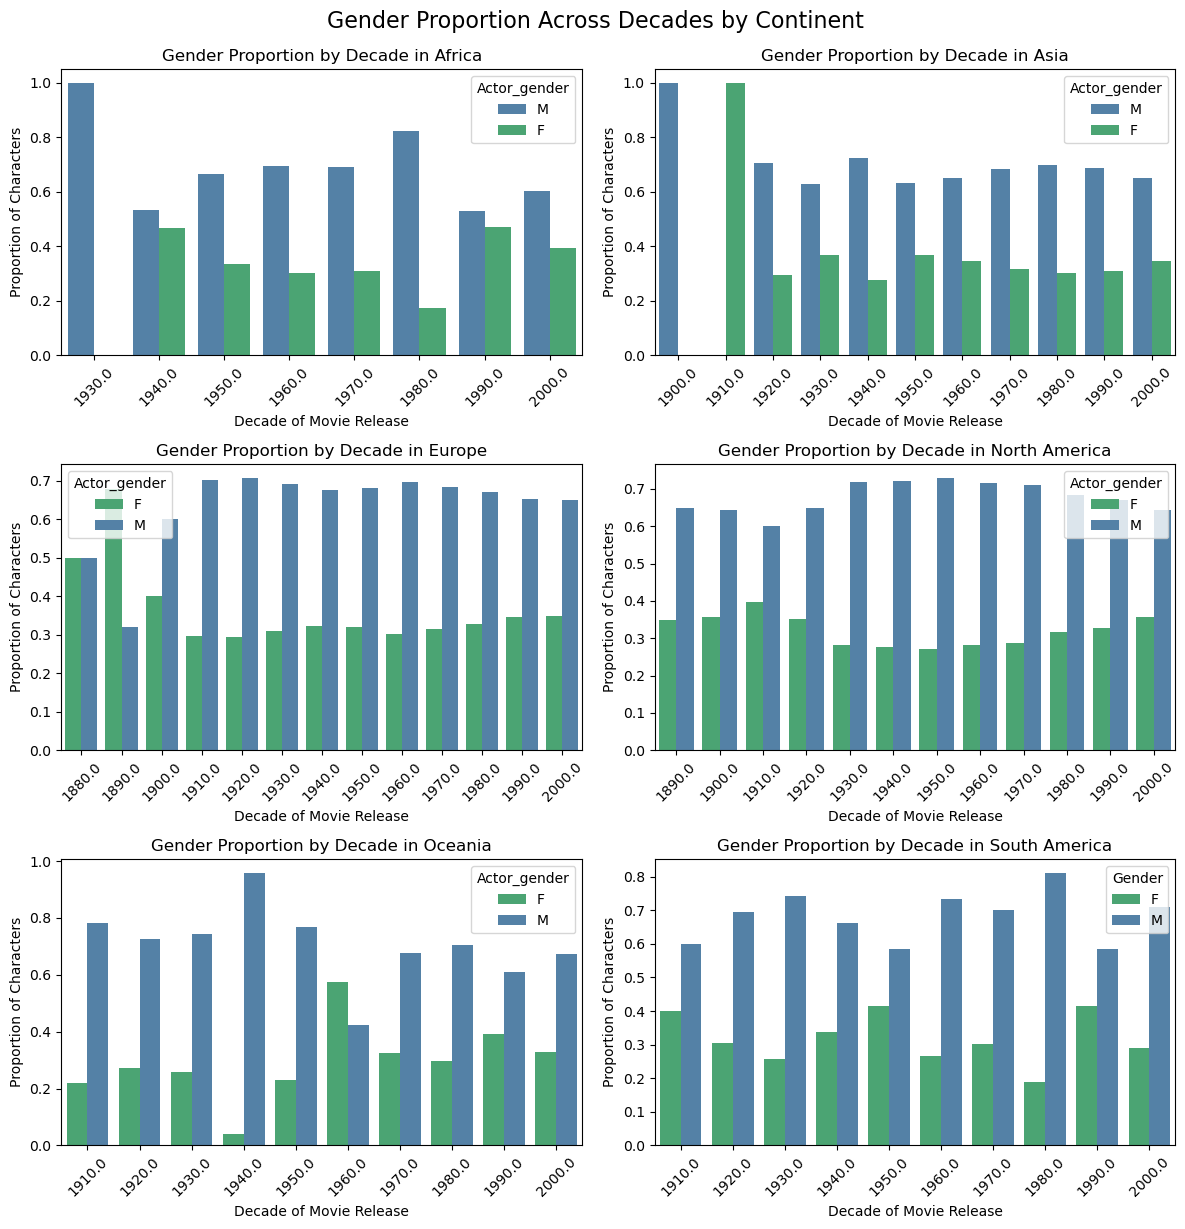

In [56]:
# Group by continent, movie release decade, and actor gender, then count occurrences
gender_counts = (
    df_actor_continent.groupby(['continent', 'Movie_release_decade', 'Actor_gender'])
    .size()
    .reset_index(name='Count')
)

# Calculate proportions within each continent and decade
gender_proportion = (
    gender_counts.groupby(['continent', 'Movie_release_decade'])
    .apply(lambda x: x.assign(Proportion=x['Count'] / x['Count'].sum()))
    .reset_index(drop=True)
)

# Create subplots for each continent
fig, axes = plt.subplots(3, 2, figsize=(12, 12)) 
axes = axes.ravel() 

# Loop through each continent and create a bar plot in a subplot
continents = gender_proportion['continent'].unique()
for ax, continent in zip(axes, continents):
    df = gender_proportion[gender_proportion['continent'] == continent]
    
    # Define a custom palette
    custom_palette = {"M": "#4682B4", 
                      "F": "#3CB371"}
    sns.barplot(data=df, x="Movie_release_decade", y="Proportion", hue="Actor_gender", ax=ax, palette=custom_palette)
    
    ax.set_title(f"Gender Proportion by Decade in {continent}")
    ax.set_xlabel("Decade of Movie Release")
    ax.set_ylabel("Proportion of Characters")
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
fig.suptitle("Gender Proportion Across Decades by Continent", fontsize=16, y=1.02)
plt.legend(title="Gender", loc="upper right")  
plt.show()

The graphs show that gender parity has not been achieved in any continent. While the overall trends are similar, slight variations in gender representation can be observed across regions.